**Prediction of client's subscription to a term deposit**

---



---



**Name : Sulthana Moorkath**

**Organization : Entri Elevate**

**Date : 16/08/2024**


---



---



**About Dataset :**

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term
deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

**Data Set Information**

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the
product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

**Goal:**

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Features:**

* age (numeric)

* job: type of job(categorical:'management','technician','entrepreneur','blue-collar','unknown','retired','admin','services','self-employed','unemployed','housemaid','student')

* marital: marital status (categorical:"divorced","married","single")

* education: education of individual (categorical:'tertiary','secondary','unknown','primary')

* default: has credit in default? (categorical: "no","yes")

* balance: the amount of money owed (or due) on an account.

* housing: has housing loan? (categorical: "no","yes")

* loan: has personal loan? (categorical: "no","yes")

Related with the last contact of the current campaign:

* contact: contact communication type (categorical: "cellular","telephone","unknown")

* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

* day(numeric)

* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no").

Other attributes:

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* previous: number of contacts performed before this campaign and for this client (numeric)

* poutcome: outcome of the previous marketing campaign (categorical: 'unknown' 'failure' 'other' 'success')

Output variable (desired target):

* y: has the client subscribed a term deposit? (binary: "yes","no")



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_excel('/content/Bank dataset.xlsx')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [11]:
df.shape

(45211, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [17]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [18]:
#check for class imbalance

In [19]:
#target class count
df['y'].value_counts()

,count
y,
no,39922
yes,5289


Text(0.5, 0, 'target variable')

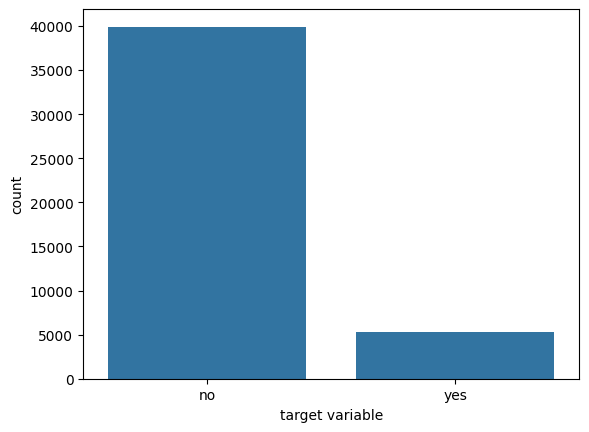

In [20]:
sns.countplot(x=df['y'])
plt.xlabel('target variable')

percentage of NO and YES


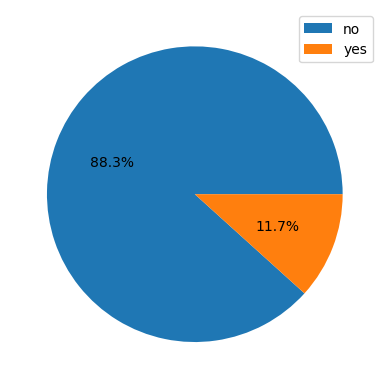

In [21]:
# percentage of class present in target variable(y)
print("percentage of NO and YES")
plt.pie(df['y'].value_counts(),autopct='%1.1f%%')
plt.legend(df['y'].value_counts().index)

The class distribution in the target variable is 88:12 indicating an imbalance dataset


**Exploratory Data Analysis**

univariate analysis of categorical variables


In [22]:
# identifying the categorical variables
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


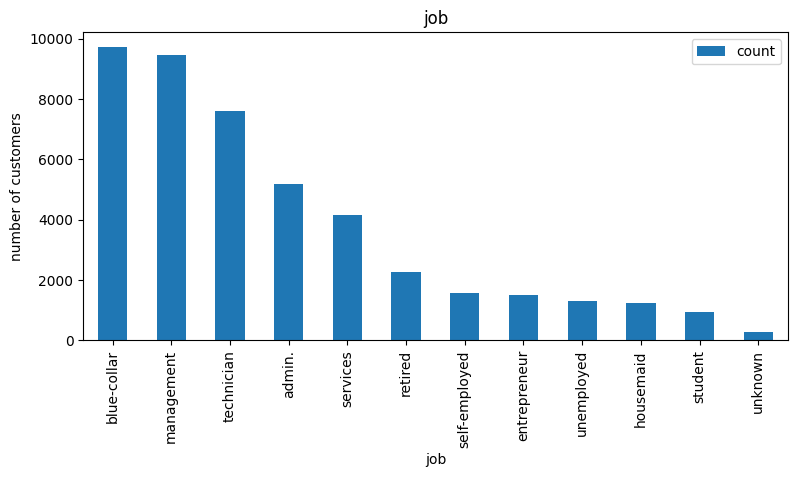

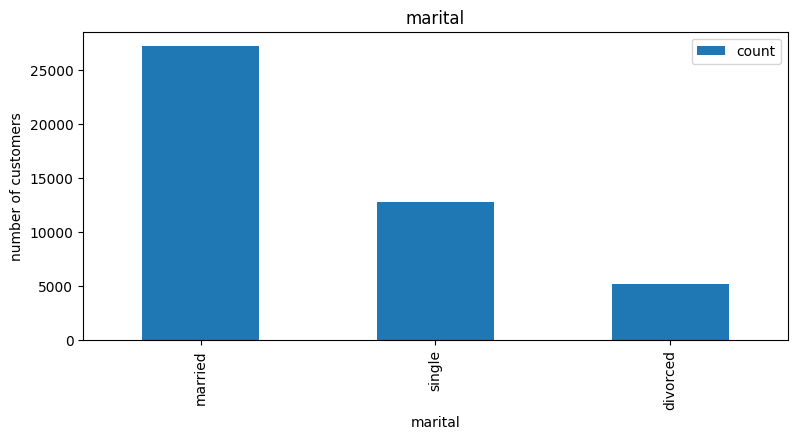

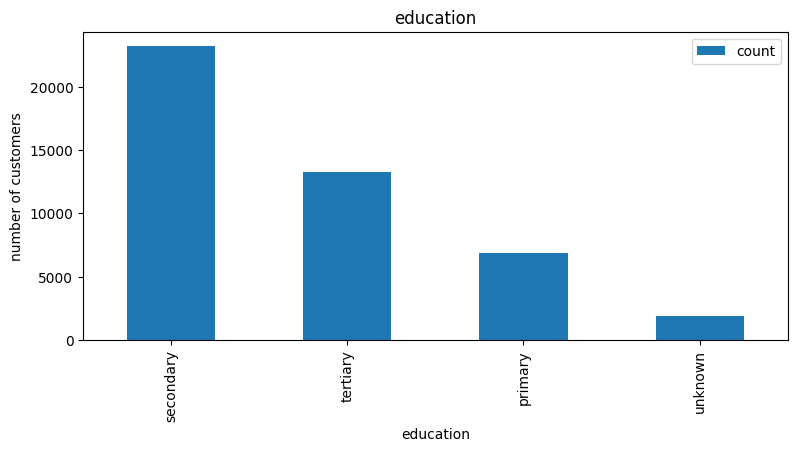

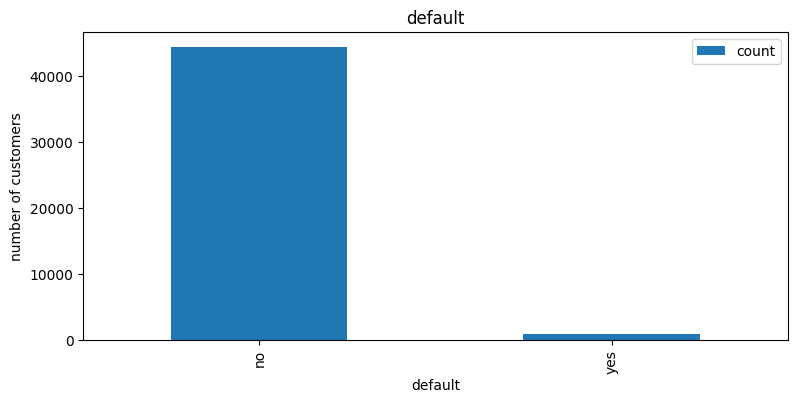

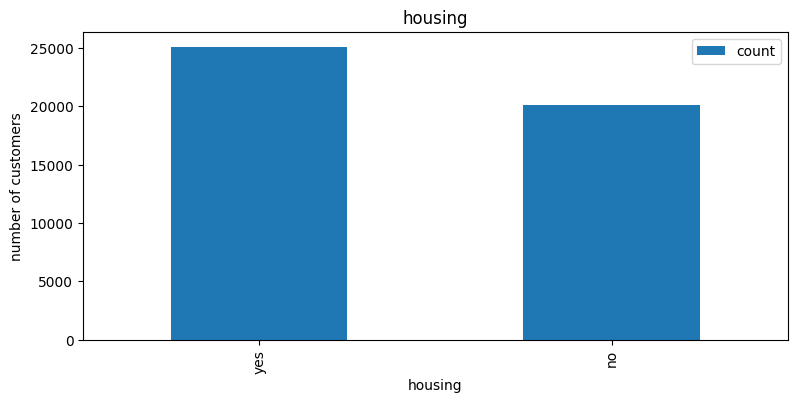

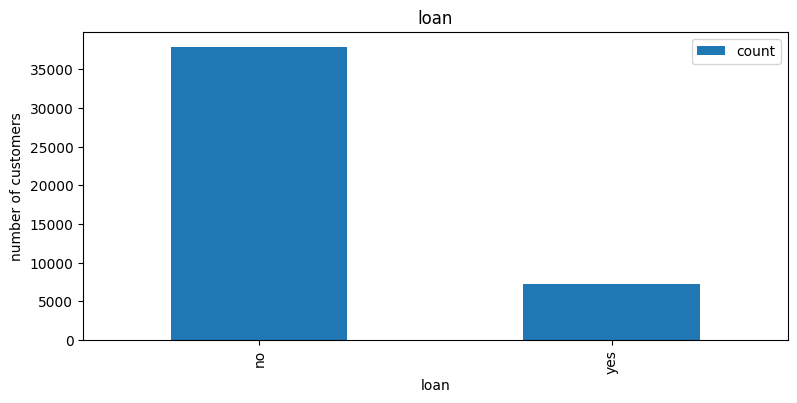

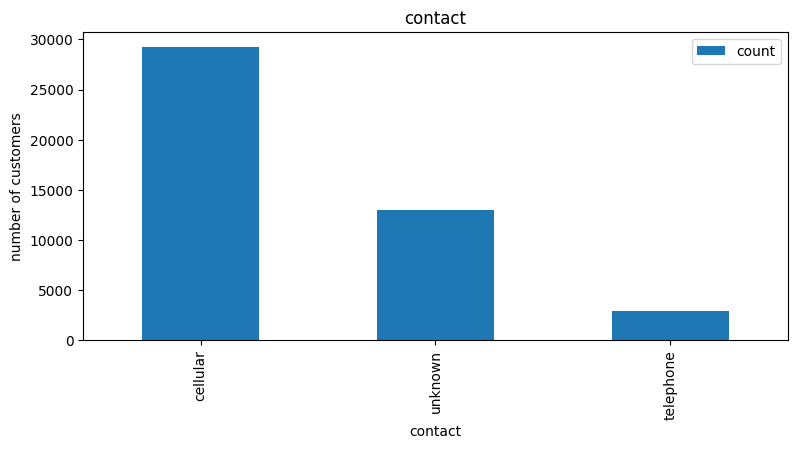

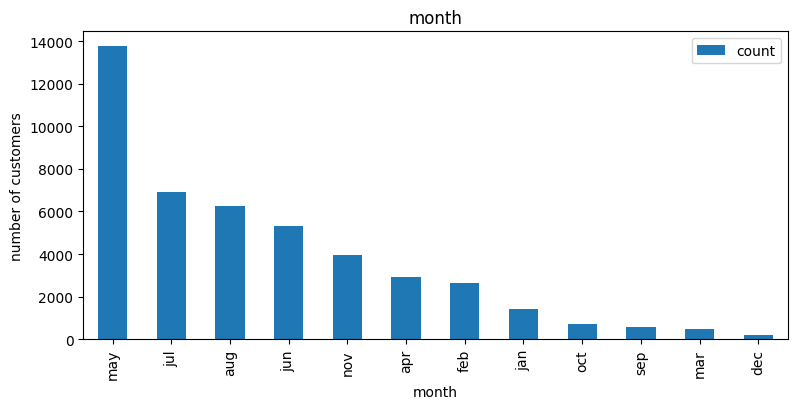

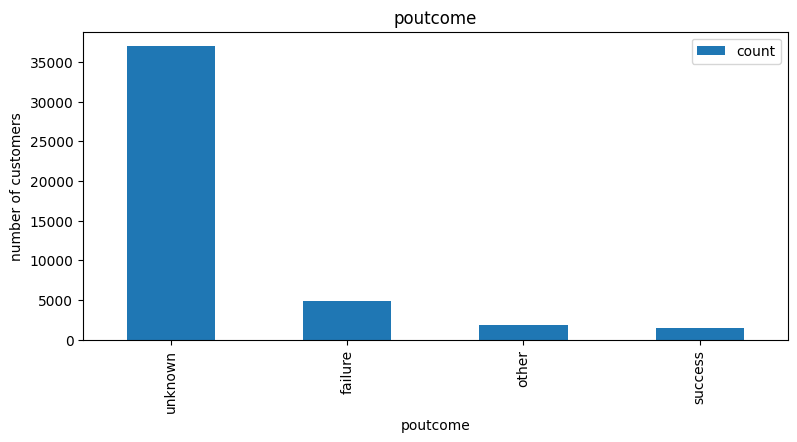

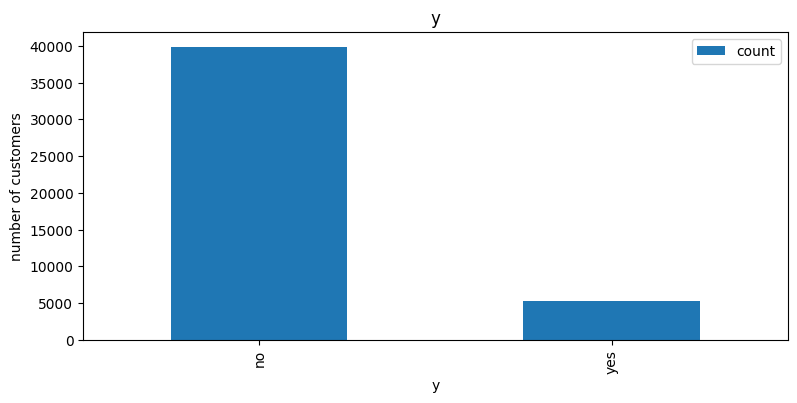

In [23]:
for column in cat_var:
 plt.figure(figsize=(20,4))
 plt.subplot(121)
 df[column].value_counts().plot(kind="bar")
 plt.xlabel(column)
 plt.ylabel("number of customers")
 plt.legend()
 plt.title(column)

Observations :

*The top three professions that our customers belong to are - blue-collar jobs, management and technicians.

*A huge number of the customers are married.

*Majority of the customers do not have a credit in default.

*Many of our past customers have applied for a housing loan but very few have applied for personal loans.

*Cell-phones seem to be the most favoured method of reaching out to customers.

*Many customers have been contacted in the month of May.

*The plot for the target variable shows heavy imbalance in the target variable

In [24]:
#unique
for i in df.columns:
 print(i)
 print(df[i].unique())
 print('----------------------------------------------------------------')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
----------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------------------------------
marital
['married' 'single' 'divorced']
----------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------------------------------
default
['no' 'yes']
----------------------------------------------------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
----------------------------------------------------------------
housing
['yes' 'no']
-----------------------------

The missing values in some columns have been represented as unknown.

In [25]:
#replacing 'unknown' with mode
lst=['job','education','contact']
for i in lst:
 mode=df[i].mode()[0]
 df[i]=df[i].replace('unknown',mode)

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no


In [27]:
for i in df.columns:
 print(i)
 print(df[i].unique())
 print('----------------------------------------------------------------')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
----------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
----------------------------------------------------------------
marital
['married' 'single' 'divorced']
----------------------------------------------------------------
education
['tertiary' 'secondary' 'primary']
----------------------------------------------------------------
default
['no' 'yes']
----------------------------------------------------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
----------------------------------------------------------------
housing
['yes' 'no']
--------------------------------------------------

Univariate analysis of Numerical columns

In [28]:
# identifying the numerical variables
num_var= df.select_dtypes(include=np.number)
num_var.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


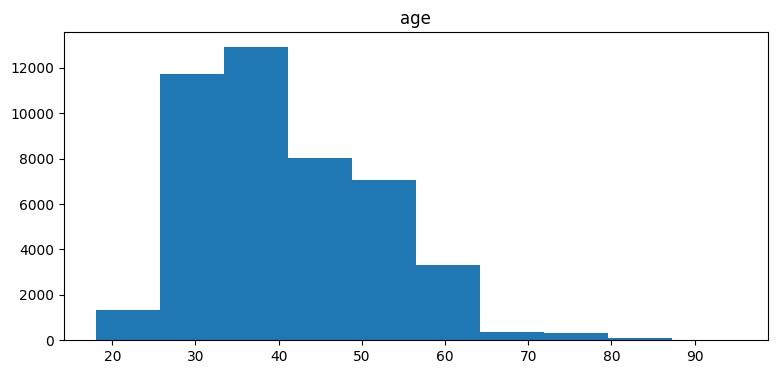

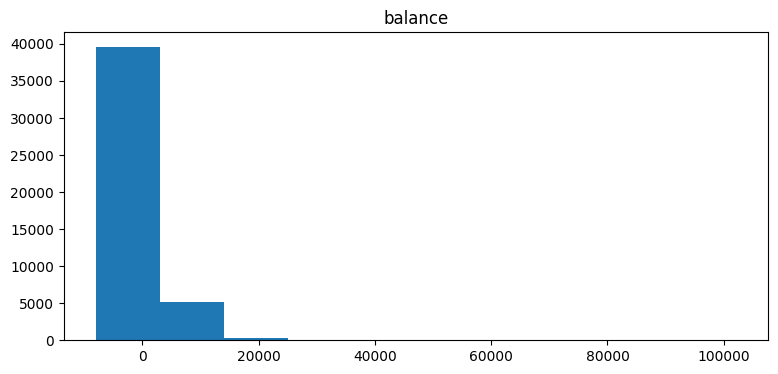

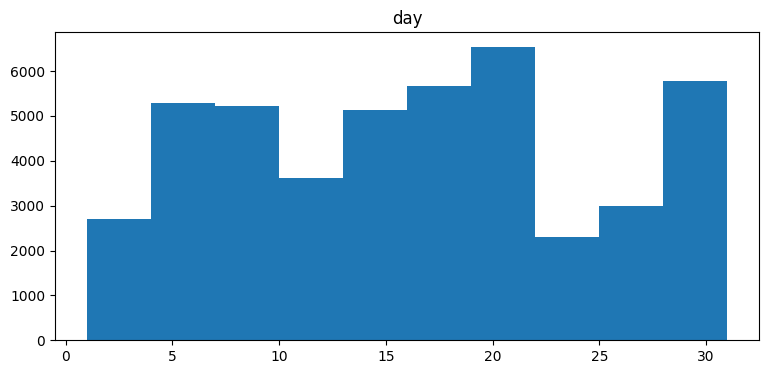

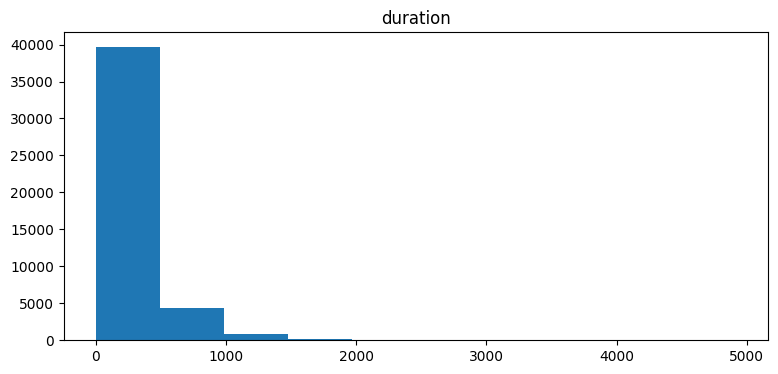

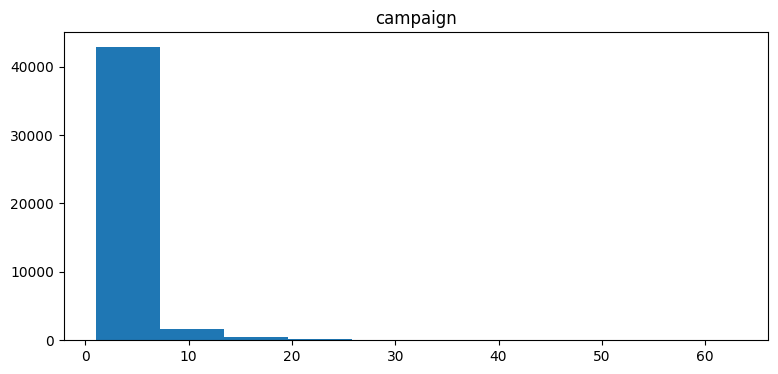

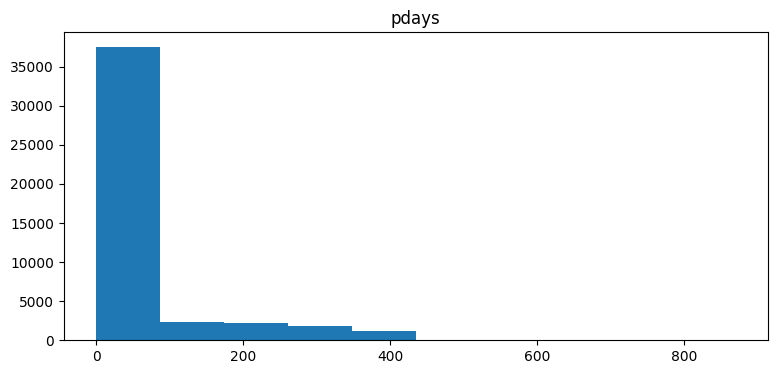

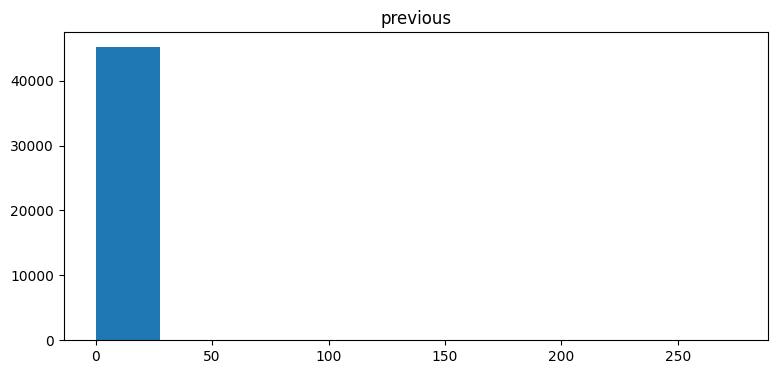

In [29]:
for column in num_var:
 plt.figure(figsize=(20,4))
 plt.subplot(121)
 plt.hist(x=df[column])
 plt.title(column)

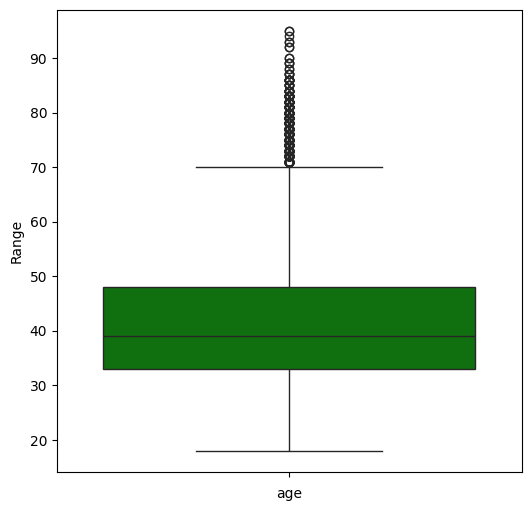

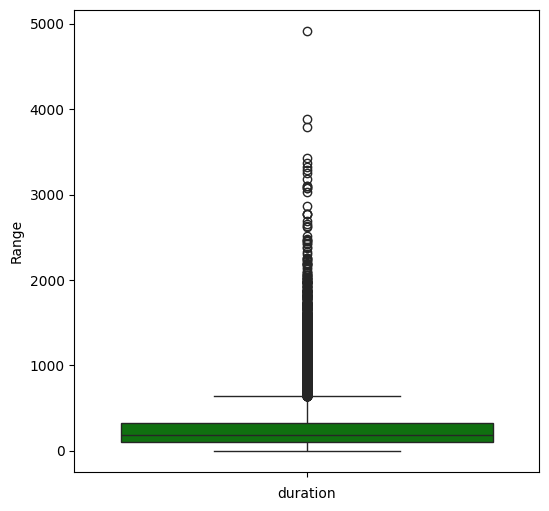

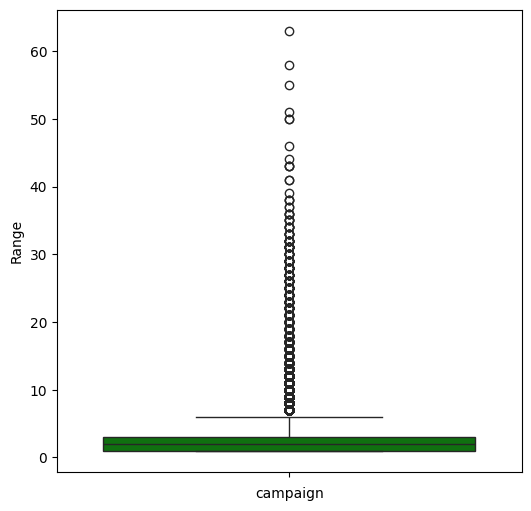

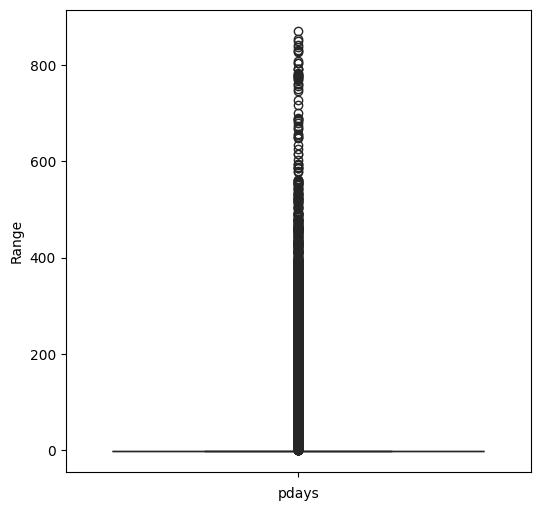

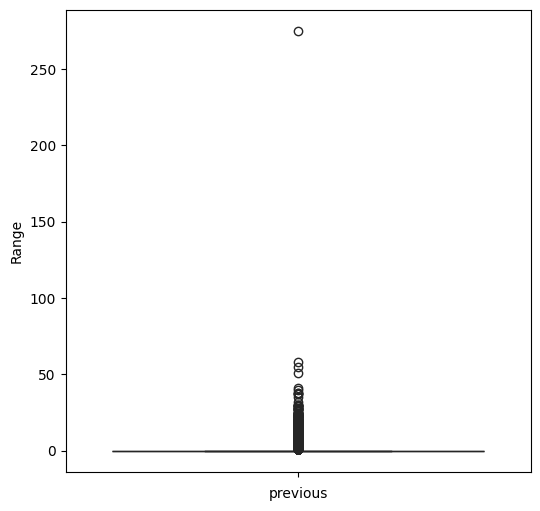

In [30]:
for i in["age", "duration", "campaign","pdays", "previous"]:
 plt.figure(figsize=(6, 6))
 sns.boxplot(df[i], color='green')
 plt.xlabel(i)
 plt.ylabel('Range')

**Observation :**

*As we can see from the histogram, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.


*Since pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.


In [31]:
df.drop(columns=["pdays", "previous"], axis=1,inplace=True)

In [32]:
df.drop(columns=["balance"], axis=1,inplace=True)

**Bivariate Analysis of Categorical columns**

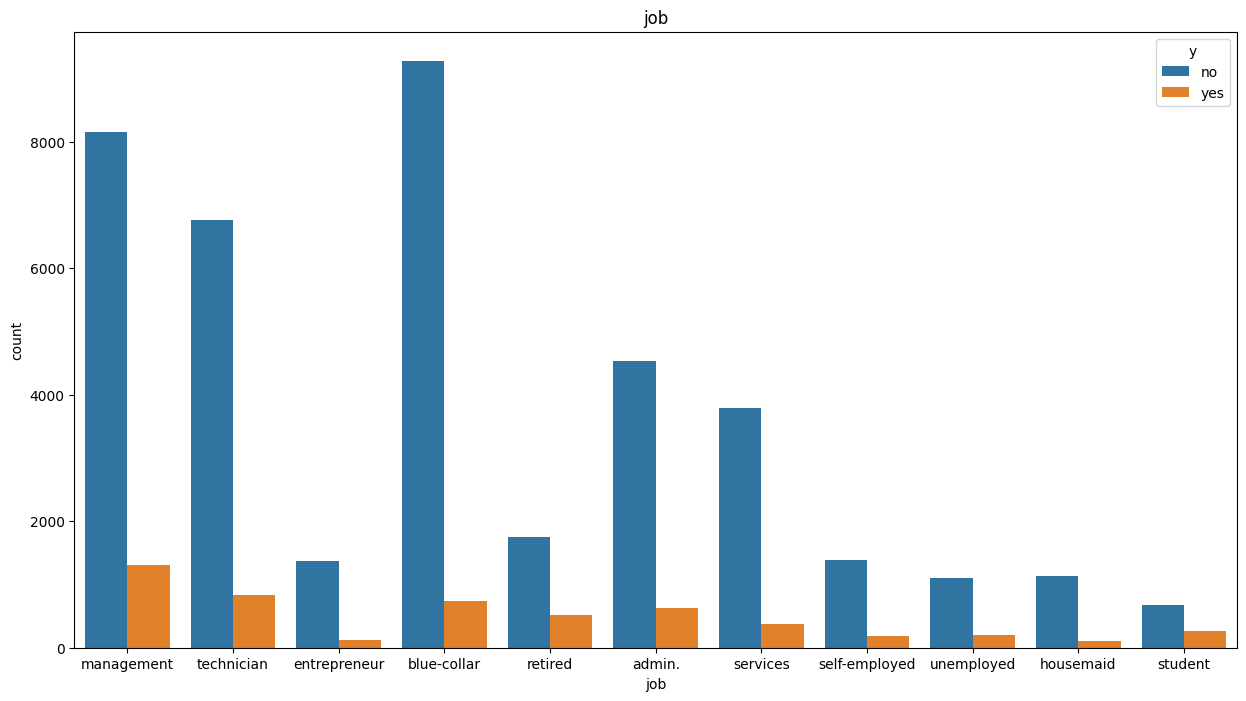

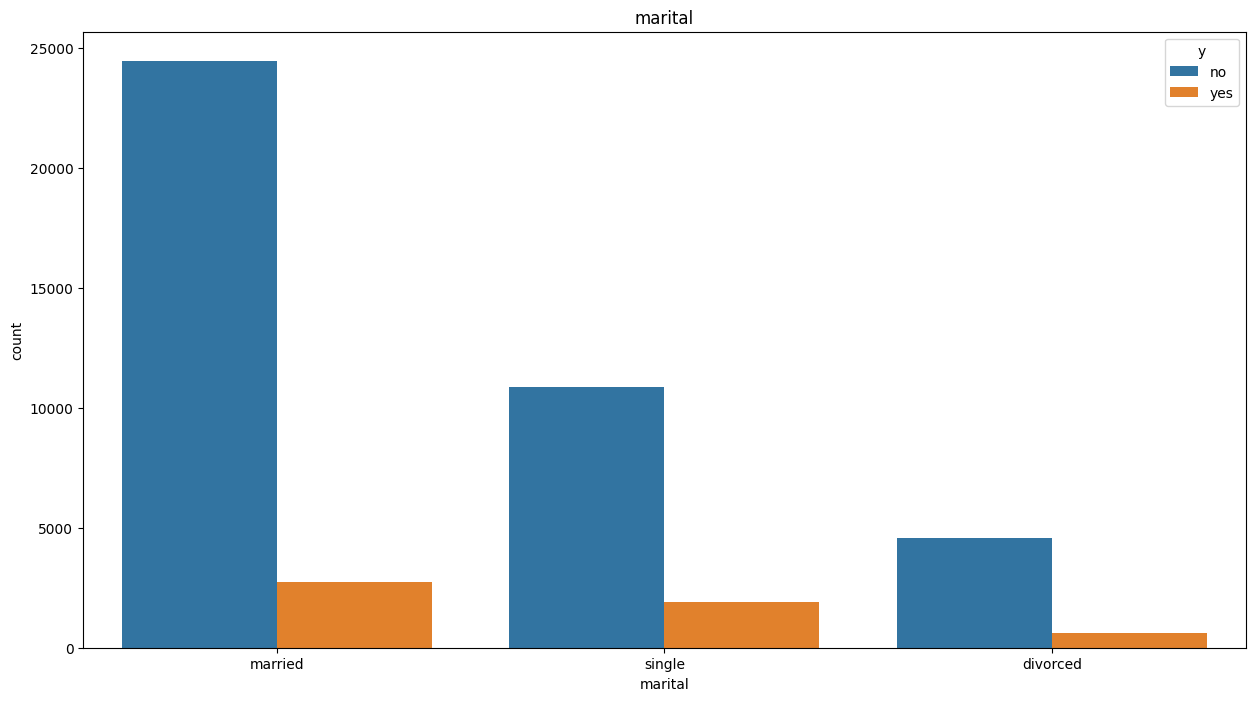

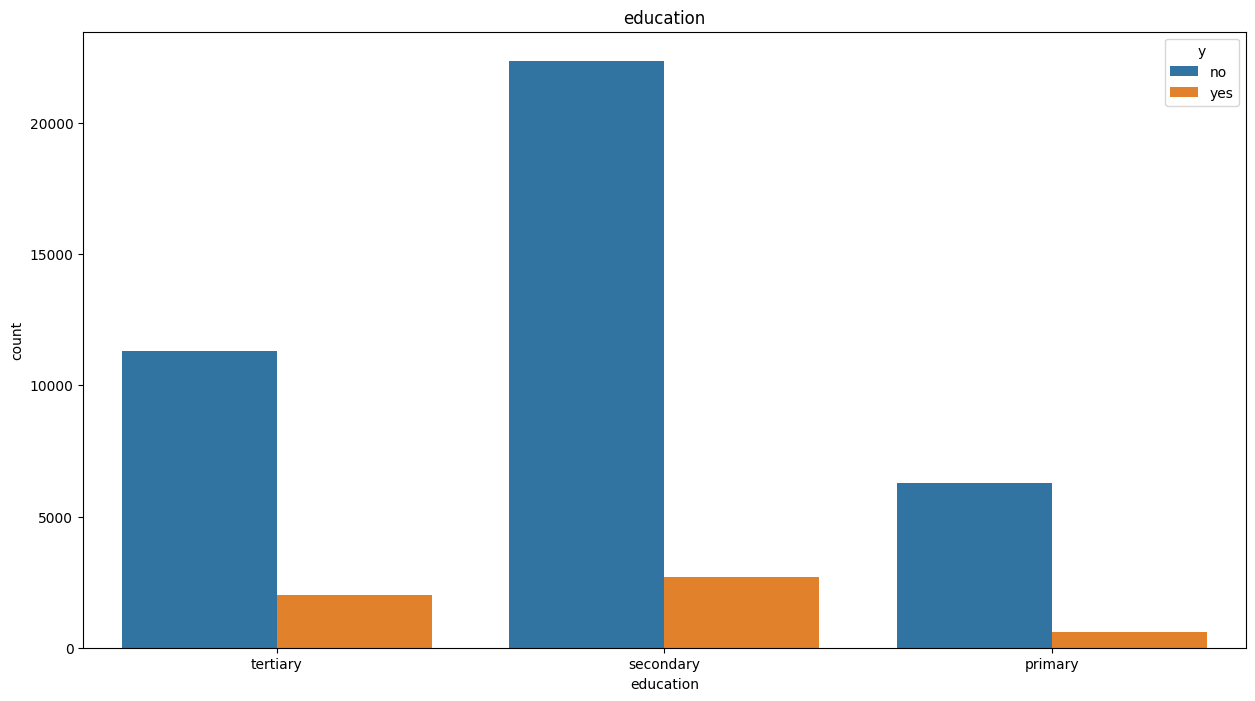

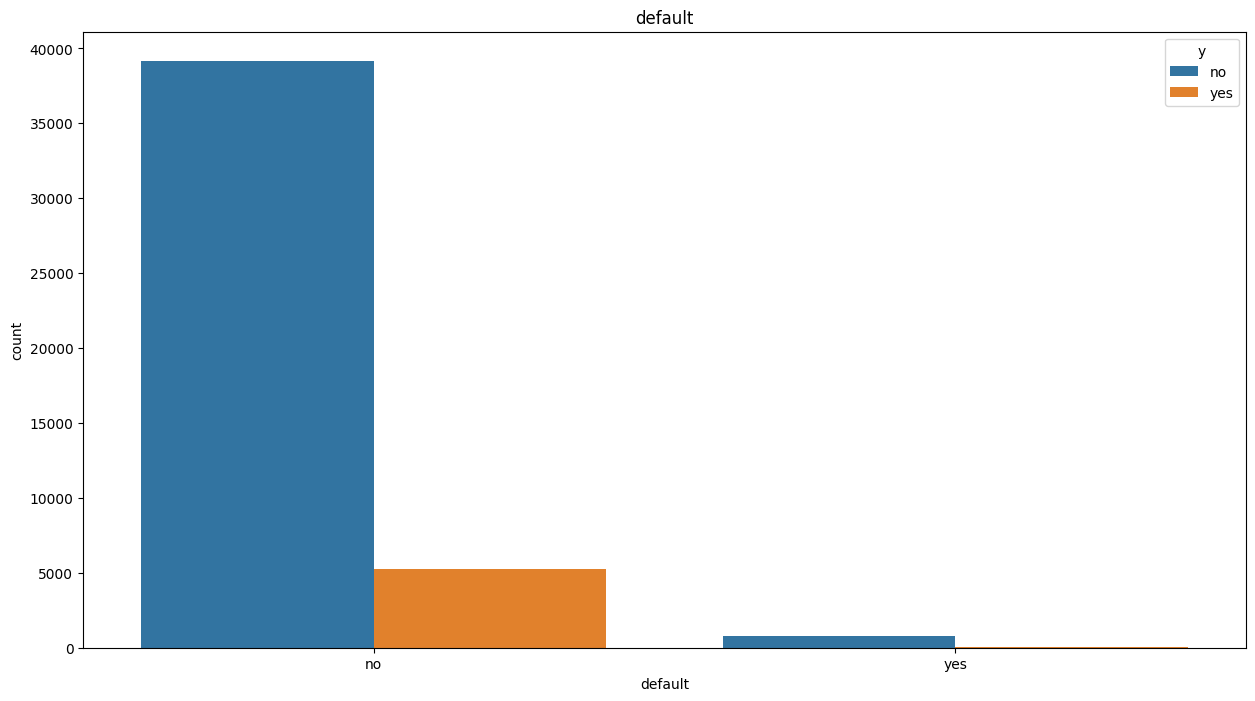

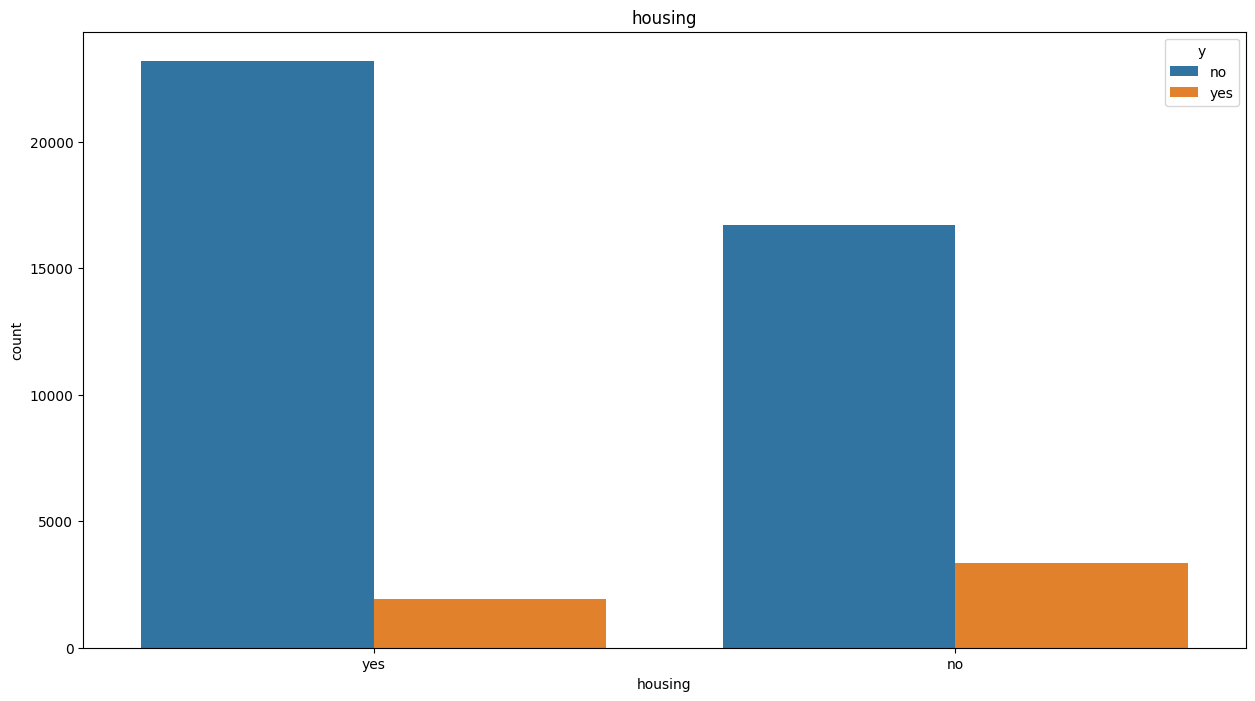

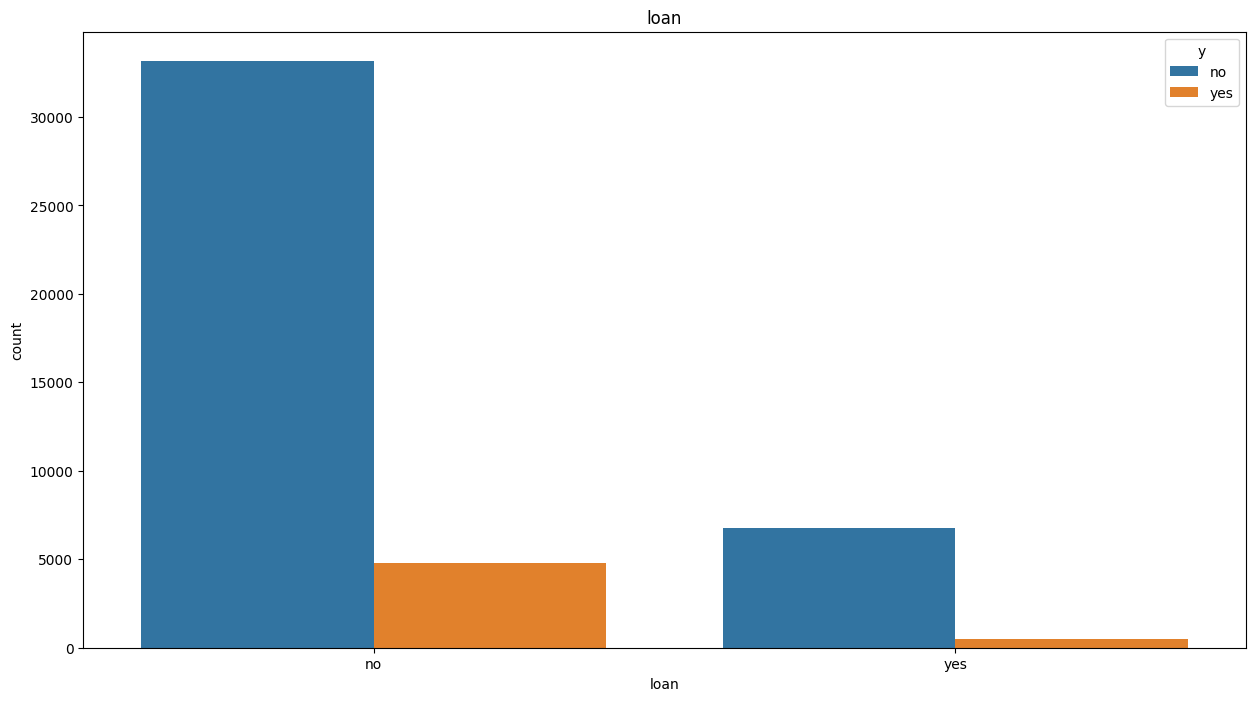

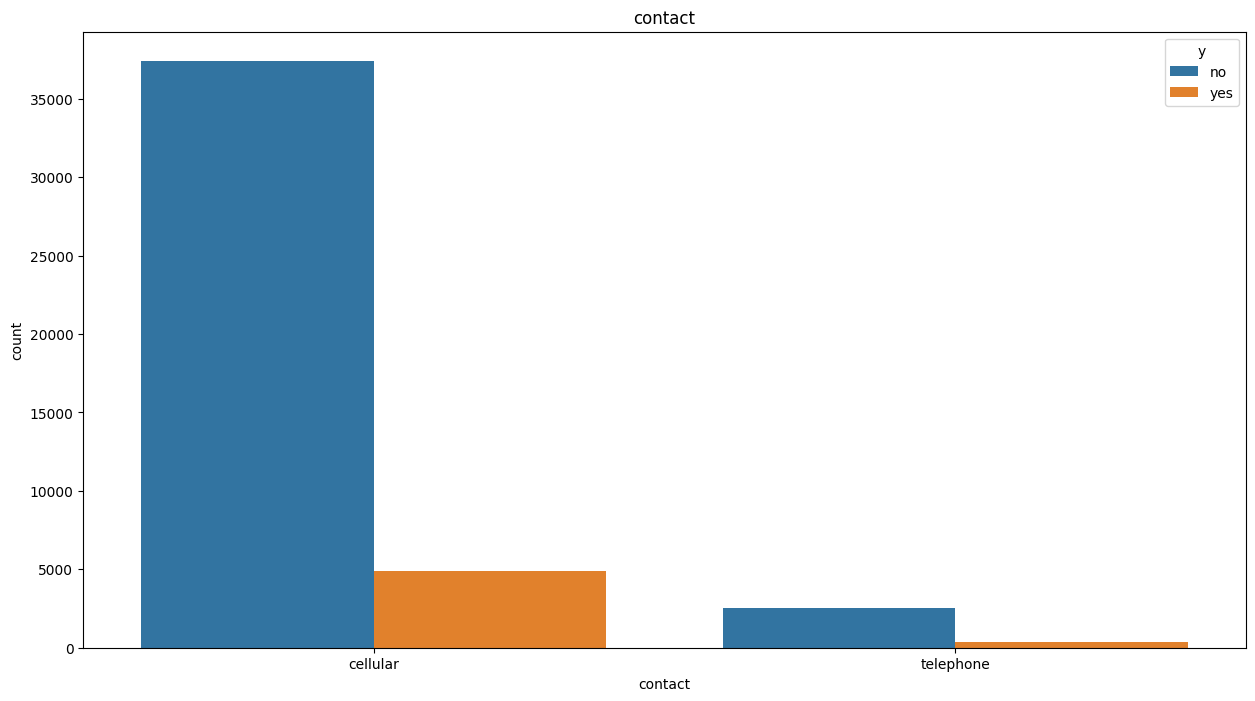

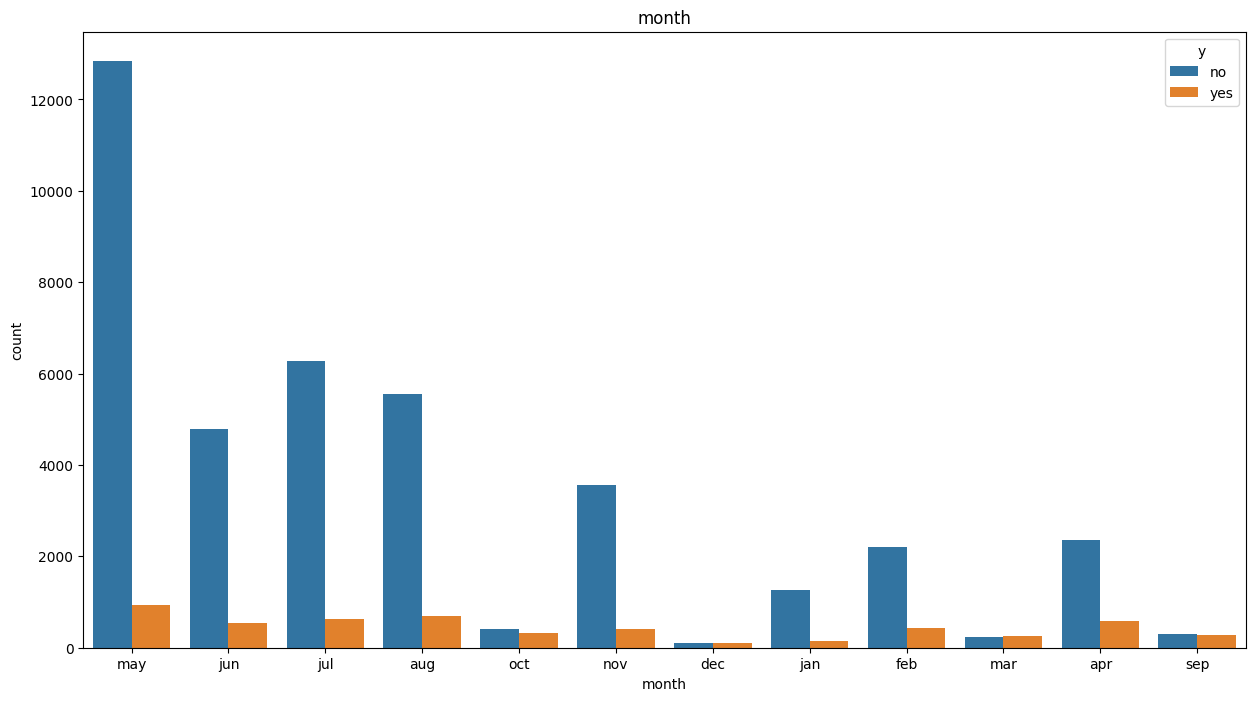

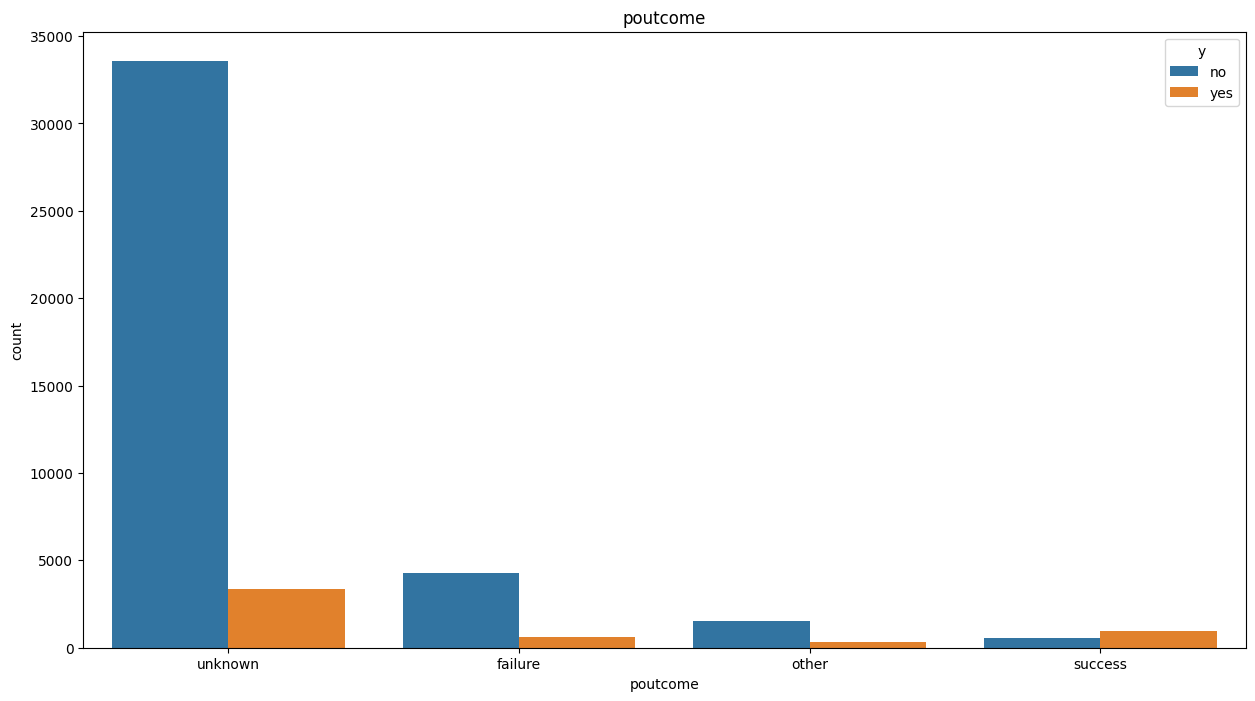

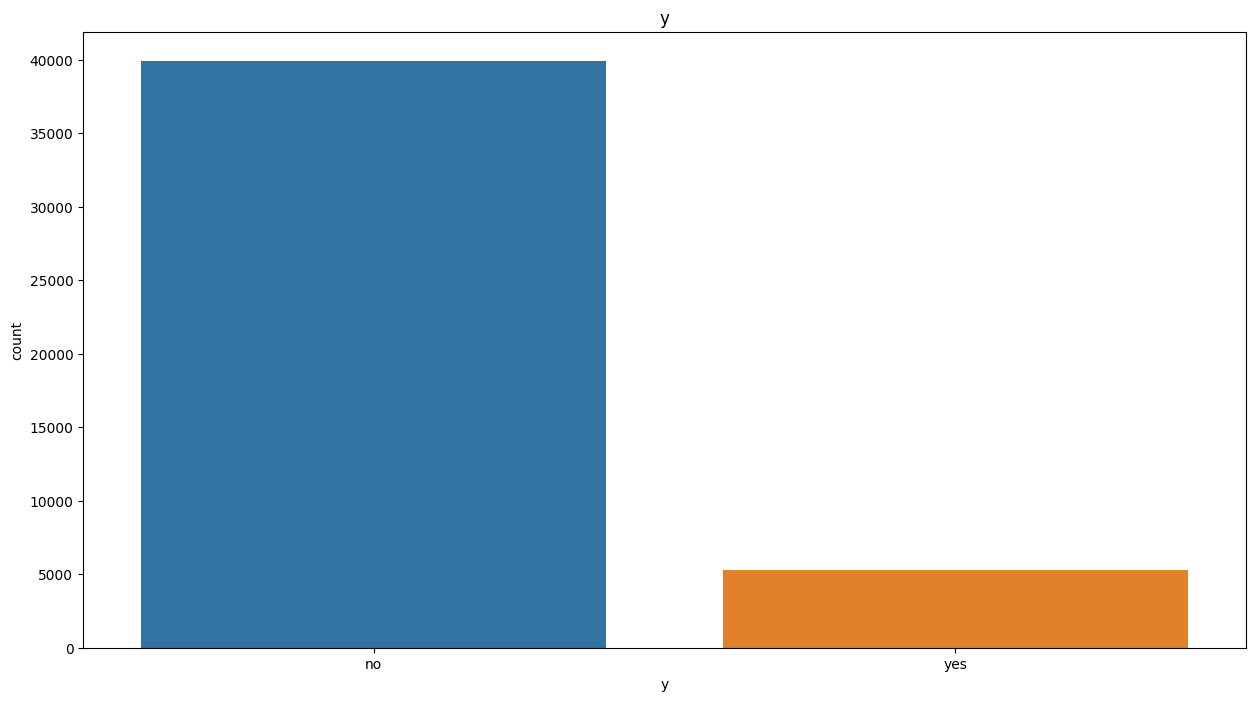

In [33]:
for column in cat_var:
 plt.figure(figsize=(15,8))
 sns.countplot(x=df[column],hue=df["y"])
 plt.title(column)

**Observations:**

*Customers having blue-collar jobs form the majority amongst those who have subscirbed to the term deposit.

*They are married.

*They have completed secondary education.

*They do not hold a credit in default.

*Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to the term deposit.

*Cell-phones should be the preferred mode of contact for contacting customers

**Handling outliers:**

Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers

In [34]:
df.describe()

,age,day,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


age,day,duration and compaign are skewed towards right,we will compute the IQR(Interquartile Range) and replace the outliers with the lower and upper bounderies.

In [35]:
lower=[]
upper=[]
for i in ["age","day","duration","campaign"]:
 q1=df[i].quantile(0.25)
 q3=df[i].quantile(0.75)
 IQR=q3-q1
 lower_bound=q1-(IQR*1.5)
 upper_bound=q3+(IQR*1.5)
 print(i,':',lower_bound,',',upper_bound)
 lower.append(lower_bound)
 upper.append(upper_bound)

age : 10.5 , 70.5
day : -11.5 , 40.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [36]:
# replace all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age","day","duration","campaign"]:
 df.loc[df[i]>upper[j],i]=int(upper[j])
 j+=1

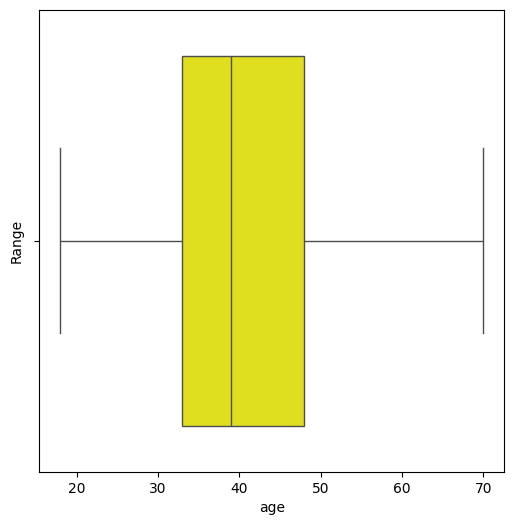

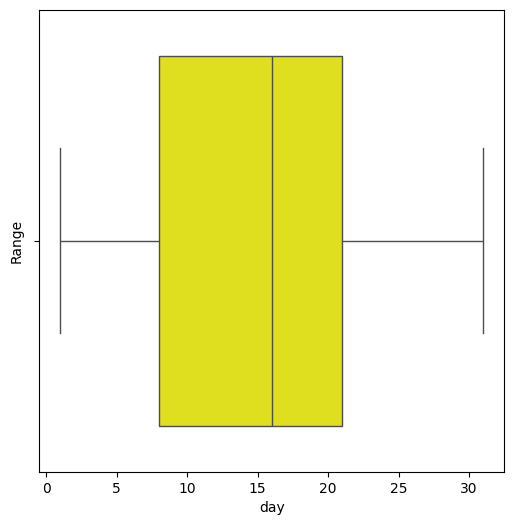

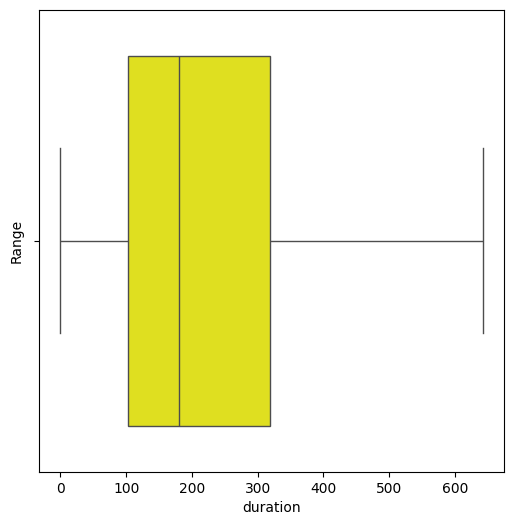

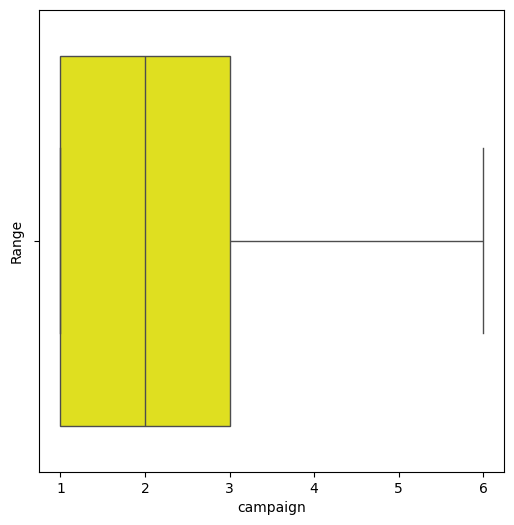

In [37]:
for i in["age","day","duration","campaign"]:
 plt.figure(figsize=(6, 6))
 sns.boxplot(x=df[i],color='yellow')
 plt.xlabel(i)
 plt.ylabel('Range')

Since,

*for age the lower boundary (10.5) < minimum value (18)

*for day,duration and campaign the lower boundaries are negative (-11.5),(-221.0), (-2.0) resp.

replacing outliers with the lower boundary is not required.


In [38]:
#without outliers
df.describe()

,age,day,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.862799,15.806419,234.939307,2.392228
std,10.379659,8.322476,176.749932,1.600111
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,70.000000,31.000000,643.000000,6.000000


After replacing the outliers with the upper boundary, the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles.

**Encoding categorical Features**

Machine learning algorithm can only read numerical values.Therefore it is essential to encode categorical features into numerical values.we will Label Encode them,as One Hot Encoding would create so many columns


In [39]:
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [40]:
for i in cat_var:
 print(i, ":", df[i].unique())
 print('---------------------------------')

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
---------------------------------
marital : ['married' 'single' 'divorced']
---------------------------------
education : ['tertiary' 'secondary' 'primary']
---------------------------------
default : ['no' 'yes']
---------------------------------
housing : ['yes' 'no']
---------------------------------
loan : ['no' 'yes']
---------------------------------
contact : ['cellular' 'telephone']
---------------------------------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
---------------------------------
poutcome : ['unknown' 'failure' 'other' 'success']
---------------------------------
y : ['no' 'yes']
---------------------------------


In this, "education","job," "marital," "default," "housing," "loan," "contact," "month," "day_of_week," and "poutcome" are likely nominal variables in this dataset.

In [41]:
df['education']=df['education'].map({"tertiary":0,"secondary":1,"primary":2})
df['default']=df['default'].map({'yes':0,'no':1})
df['housing']=df['housing'].map({'yes':0,'no':1})
df['loan']=df['loan'].map({'yes':0,'no':1})
df['y']=df['y'].map({'yes':1,'no':0})

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
 if df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])
df.head(10)


,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,4,1,0,1,0,1,0,5,8,261,1,3,0
1,44,9,2,1,1,0,1,0,5,8,151,1,3,0
2,33,2,1,1,1,0,0,0,5,8,76,1,3,0
3,47,1,1,1,1,0,1,0,5,8,92,1,3,0
4,33,1,2,1,1,1,1,0,5,8,198,1,3,0
5,35,4,1,0,1,0,1,0,5,8,139,1,3,0
6,28,4,2,0,1,0,0,0,5,8,217,1,3,0
7,42,2,0,0,0,0,1,0,5,8,380,1,3,0
8,58,5,1,2,1,0,1,0,5,8,50,1,3,0
9,43,9,2,1,1,0,1,0,5,8,55,1,3,0


Checking Correlation of feature variables

<Axes: >

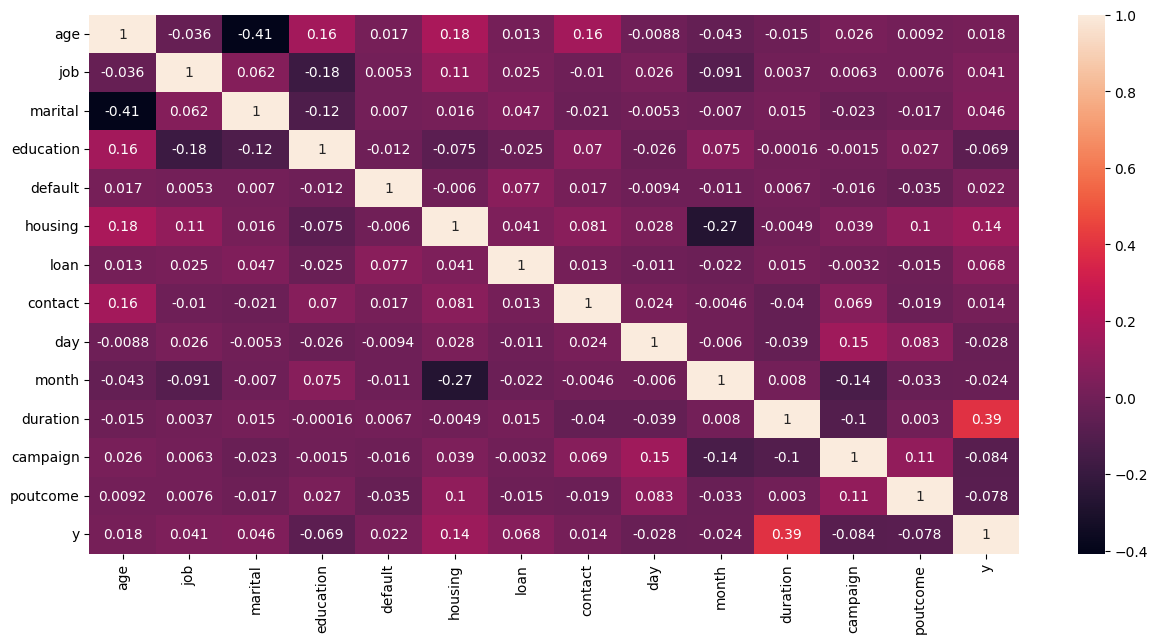

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

We observe that there are no pairs of features with a correlation coefficient greater than 0.8 or less than -0.8. This indicates that none of the features are highly correlated or inversely correlated with each other. As a result, there is no need to drop any features based on high correlation, as they do not appear to be redundant or duplicative in representing the information in the dataset.

**Separating independent and dependent variables**

In [44]:
# feature variables
x= df.iloc[:, :-1]

# target variable
y= df.iloc[:, -1]

#categorical features
m=df.drop(['age','day','campaign','duration'],axis=1)

In [45]:
from sklearn.feature_selection import chi2
score=chi2(m,y)
score

(array([1.84576876e+02, 2.97660665e+01, 1.05665345e+02, 4.09627176e-01,
        4.86744003e+02, 3.36787973e+01, 8.34216579e+00, 4.43219051e+01,
        1.04677479e+02, 3.99220000e+04]),
 array([4.85478610e-042, 4.87449759e-008, 8.73008648e-025, 5.22158797e-001,
        7.28257003e-108, 6.50053767e-009, 3.87353947e-003, 2.78581489e-011,
        1.43725371e-024, 0.00000000e+000]))

In [46]:
#fscore
f_value=pd.Series(score[0],index=m.columns)
f_value.sort_values(ascending=False)

,0
y,39922.000000
housing,486.744003
job,184.576876
education,105.665345
poutcome,104.677479
month,44.321905
loan,33.678797
marital,29.766067
contact,8.342166
default,0.409627


In [47]:
#p value
p_value=pd.Series(score[1],index=m.columns)
p_value.sort_values(ascending=False)

,0
default,5.221588e-01
contact,3.873539e-03
marital,4.874498e-08
loan,6.500538e-09
month,2.785815e-11
poutcome,1.437254e-24
education,8.730086e-25
job,4.854786e-42
housing,7.282570e-108
y,0.000000e+00


Text(0.5, 1.0, 'p-value graph')

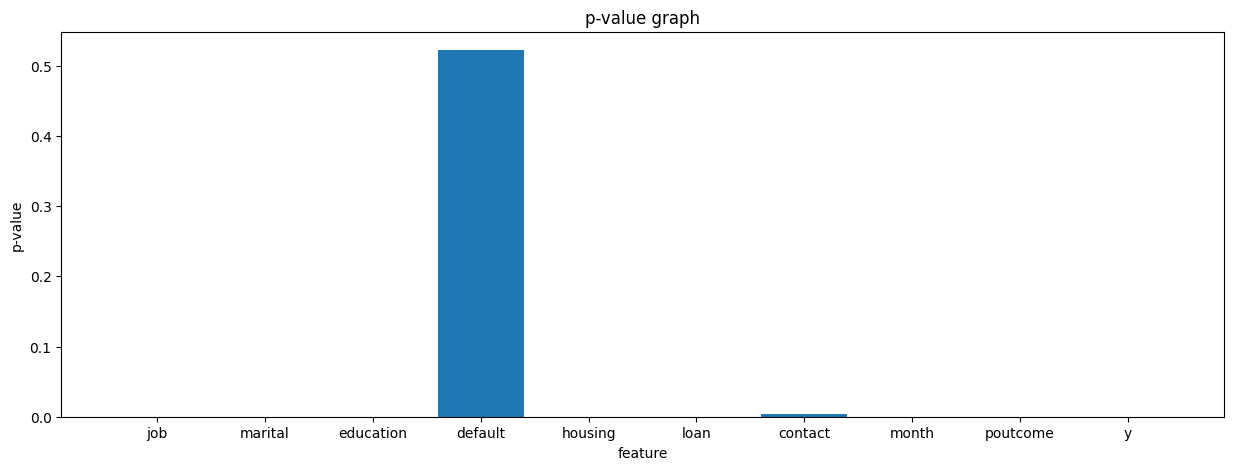

In [48]:

plt.figure(figsize=(15,5))
plt.bar(p_value.index,p_value)
plt.xlabel('feature')
plt.ylabel('p-value')
plt.title("p-value graph")


In [49]:
X=x.drop(['default'],axis=1)

**Handling imbalanced dataset**

Since the class distribution in the target variable is 88:12 indicating an imbalance dataset, we need to resample it.

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(X,y)
y_resampled.value_counts()


,count
y,
0,39922
1,39922


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled, y_resampled,random_state=42,test_size=0.30)

In [52]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [53]:
#model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
knn=KNeighborsClassifier()
nb=BernoulliNB()
lr=LogisticRegression()
dec=DecisionTreeClassifier(criterion='entropy')
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')


In [86]:

lst=[knn,nb,lr,dec,rf]
for i in lst:
 i.fit(x_train,y_train)
 y_pred=i.predict(x_test)
 print(i)
 print('Score:',accuracy_score(y_pred,y_test))
 print(classification_report(y_pred,y_test))
 print(confusion_matrix(y_pred,y_test))
 print('------------------------------------------------------')

KNeighborsClassifier()
Score: 0.8787676379727811
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     11329
           1       0.91      0.86      0.88     12625

    accuracy                           0.88     23954
   macro avg       0.88      0.88      0.88     23954
weighted avg       0.88      0.88      0.88     23954

[[10199  1130]
 [ 1774 10851]]
------------------------------------------------------
BernoulliNB()
Score: 0.7820823244552058
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     11207
           1       0.81      0.77      0.79     12747

    accuracy                           0.78     23954
   macro avg       0.78      0.78      0.78     23954
weighted avg       0.78      0.78      0.78     23954

[[8980 2227]
 [2993 9754]]
------------------------------------------------------
LogisticRegression()
Score: 0.8050429990815731
              precision    recall  f1-scor

**Gridsearch and hyperparameter tuning**

* KNeighborsClassifier




In [68]:
from sklearn.model_selection import GridSearchCV

knn_param_grid={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
knn_grid_search=GridSearchCV(knn,knn_param_grid,cv=7)
knn_grid_search.fit(x_train,y_train)
knn_best_model=knn_grid_search.best_estimator_
y_pred_knn=knn_best_model.predict(x_test)
print("Best parameters for KNN:",knn_grid_search.best_params_)
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     11973
           1       0.87      0.92      0.89     11981

    accuracy                           0.89     23954
   macro avg       0.89      0.89      0.89     23954
weighted avg       0.89      0.89      0.89     23954

[[10299  1674]
 [  959 11022]]


* Naive Bayes

In [61]:
naive_bayes_param_grid={'alpha':[0.1,1,10],'binarize':[0.5]}
naive_bayes_grid_search=GridSearchCV(nb,naive_bayes_param_grid,cv=7)
naive_bayes_grid_search.fit(x_train,y_train)
naive_bayes_best_model=naive_bayes_grid_search.best_estimator_
y_pred_naive_bayes=naive_bayes_best_model.predict(x_test)
print("Best parameters for Naive Bayes:",naive_bayes_grid_search.best_params_)
print(classification_report(y_test,y_pred_naive_bayes))
print(confusion_matrix(y_test,y_pred_naive_bayes))

Best parameters for Naive Bayes: {'alpha': 0.1, 'binarize': 0.5}
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     11973
           1       0.80      0.80      0.80     11981

    accuracy                           0.80     23954
   macro avg       0.80      0.80      0.80     23954
weighted avg       0.80      0.80      0.80     23954

[[9551 2422]
 [2362 9619]]


* Logistic Regression

In [62]:
logistic_regression_param_grid={'C':[0.1,1,10],'penalty':['l1','l2'],'solver':['liblinear','saga']}
logistic_regression_model=LogisticRegression(max_iter=1000)
logistic_regression_grid_search=GridSearchCV(logistic_regression_model,logistic_regression_param_grid,cv=7)
logistic_regression_grid_search.fit(x_train,y_train)
logistic_regression_best_model=logistic_regression_grid_search.best_estimator_
y_pred_logistic_regression=logistic_regression_best_model.predict(x_test)
print("Best parameters for LogisticRegression:",logistic_regression_grid_search.best_estimator_)
print(classification_report(y_test,y_pred_logistic_regression))
print(confusion_matrix(y_test,y_pred_logistic_regression))

Best parameters for LogisticRegression: LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     11973
           1       0.80      0.82      0.81     11981

    accuracy                           0.80     23954
   macro avg       0.81      0.80      0.80     23954
weighted avg       0.81      0.80      0.80     23954

[[9487 2486]
 [2186 9795]]


* DecisionTreeClassifier

In [63]:
decision_tree_param_grid = {'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}
decision_tree_model = DecisionTreeClassifier()
decision_tree_grid_search = GridSearchCV(decision_tree_model, decision_tree_param_grid, cv=7)
decision_tree_grid_search.fit(x_train, y_train)
decision_tree_best_model = decision_tree_grid_search.best_estimator_
y_pred_decision_tree = decision_tree_best_model.predict(x_test)
print("Best parameters for DecisionTreeClassifier:",decision_tree_grid_search.best_estimator_)
print(classification_report(y_test,y_pred_decision_tree))
print(confusion_matrix(y_test,y_pred_decision_tree))

Best parameters for DecisionTreeClassifier: DecisionTreeClassifier(criterion='entropy')
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     11973
           1       0.88      0.92      0.90     11981

    accuracy                           0.90     23954
   macro avg       0.90      0.90      0.90     23954
weighted avg       0.90      0.90      0.90     23954

[[10467  1506]
 [  974 11007]]


* RandomForestClassifier

In [65]:
random_parameters = {'n_estimators':[5,10,15,20,25,30,35,40,45,50,55],'criterion':['gini','entropy']}
random_model=RandomForestClassifier()
random_grid_search = GridSearchCV(random_model,random_parameters,cv=7)
random_grid_search.fit(x_train,y_train)
random_best_model=random_grid_search.best_estimator_
y_pred_random =random_best_model.predict(x_test)
print("Best parameters for RandomForestClassifier:",random_grid_search.best_estimator_)
print(classification_report(y_test,y_pred_random))
print(confusion_matrix(y_test,y_pred_random))

Best parameters for RandomForestClassifier: RandomForestClassifier(criterion='entropy', n_estimators=55)
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     11973
           1       0.90      0.95      0.93     11981

    accuracy                           0.92     23954
   macro avg       0.92      0.92      0.92     23954
weighted avg       0.92      0.92      0.92     23954

[[10759  1214]
 [  618 11363]]


RandomForestClassifier seems to have the highest accuracy and balanced precision and recall for the positive class (1). The F1-score, which is the harmonic mean of precision and recall, is also high. This model
may be a good choice for predicting whether a customer will subscribe to a term deposit.

In [78]:
#Prediction by using a random input
y_predict1=random_best_model.predict(scaler.transform([[36,2,0,1,1,0,1,6,1,120,2,1]]))
y_predict1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [79]:

y_predict2=random_best_model.predict(scaler.transform([[69,5,1,2,1,0,1,1,0,643,1,1]]))
y_predict2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])